## Heart Disease Prediction Using 9 Models


#### INSPIRATION OF THE PROJECT

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using 9 models([LOGISTIC REGRESSION,KNN, NB,SVM, Random Forest, Decision Tree, XGBoost, GradientBoosting, AdaBoost]).

#### About Dataset (Meta data)

Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

#### Content

Column Descriptions:

      1. id(Unique id for each patient)
      2. age (Age of the patient in years)
      3. origin (place of study)
      4. sex (Male/Female)
      5. cp chest pain type
            a. typical angina.
            b. atypical angina.
            c. non-anginal.
            d. asymptomatic.
      6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
      7. chol (serum cholesterol in mg/dl)
      8. fbs (if fasting blood sugar > 120 mg/dl)
      9. restecg (resting electrocardiographic results)
      10. -- Values: [normal, stt abnormality, lv hypertrophy]
      11. thalach: maximum heart rate achieved
      12. exang: exercise-induced angina (True/ False)
      13. oldpeak: ST depression induced by exercise relative to rest
      14. slope: the slope of the peak exercise ST segment
      15. ca: number of major vessels (0-3) colored by fluoroscopy
      16. thal:[normal; fixed defect; reversible defect]
      17. num: the predicted attribute

#### Acknowledgements

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Relevant Papers:

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Citation Request:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

#### Aims & Objectives
we will fill this after some exploratory data analysis
Import Libraries
lets start the project by importing all the libraries that we will need in the project.

### Step 1 : Import Libraries

In [7]:
#import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2.To vizulize the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. to preprocess the data
from sklearn.preprocessing import SplineTransformer, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# 8. Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


### Step 2 : Load the dataset

In [9]:
df = pd.read_csv("datasets\heart_disease_uci.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Exploratory Data Analysis (EDA)
#### Explore Each Column

In [15]:
# Exploring the dtaa type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [16]:
# Checking the data shape
df.shape

(920, 16)

In [25]:
# Id column
print(f"Min id is : {df['id'].min()} and mix is : {df['id'].max()}")

Min id is : 1 and mix is : 920


In [27]:
# age column
print(f"Minimum age is : {df['age'].min()} and Maximum is : {df['age'].max()}")

Minimum age is : 28 and Maximum is : 77


### Step 3 Visualization

In [28]:
# Lets summerize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

No missing values in the column so we are good to go...


<Axes: xlabel='age', ylabel='Count'>

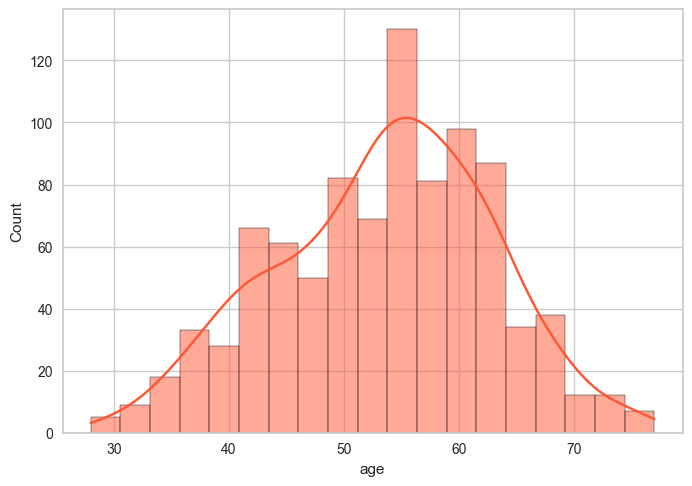

In [31]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"] 

# plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

In [39]:
print((df['age'] == 30).sum())                  # to know the particular
# or
print(df[df['age'] == 35 ].shape[0])

1
11


The age column distribution seems to be normaly distributed because we can clearly see the bill curve.

Mean is :  53.51086956521739
Median is :  54.0
Mode is :  0    54
Name: age, dtype: int64


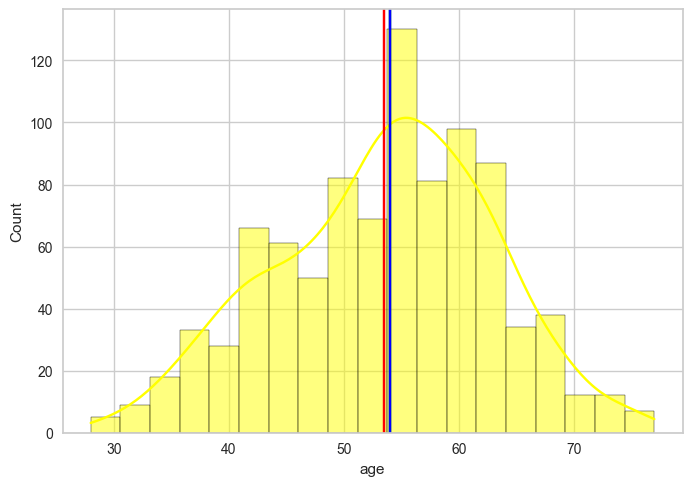

In [43]:
# Plot the mean, median, mode of age column usnig sns 
sns.histplot(df['age'], kde=True, color="Yellow")
plt.axvline(df['age'].mean(), color = "Red")
plt.axvline(df['age'].median(), color= "Green")
plt.axvline(df['age'].mode()[0], color = "Blue")

# Print the value of the mean, medain, mode of the age column
print("Mean is : ", df['age'].mean())
print("Median is : ", df['age'].median())
print("Mode is : ", df['age'].mode())